In [32]:
import pygmt
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
fm_tab = pd.read_csv("./OUTPUT_FILES/final_model.csv")


In [34]:
region=[-156.2, -154.6, 18.9, 20.2]
z = np.unique(fm_tab["dep"].values)

surface [WARNING]: 944 unusable points were supplied; these will be ignored.
surface [WARNING]: You should have pre-processed the data with block-mean, -median, or -mode.
surface [WARNING]: Check that previous processing steps write results with enough decimals.
surface [WARNING]: Possibly some data were half-way between nodes and subject to IEEE 754 rounding.


surface [WARNING]: 944 unusable points were supplied; these will be ignored.
surface [WARNING]: You should have pre-processed the data with block-mean, -median, or -mode.
surface [WARNING]: Check that previous processing steps write results with enough decimals.
surface [WARNING]: Possibly some data were half-way between nodes and subject to IEEE 754 rounding.
surface [WARNING]: 944 unusable points were supplied; these will be ignored.
surface [WARNING]: You should have pre-processed the data with block-mean, -median, or -mode.
surface [WARNING]: Check that previous processing steps write results with enough decimals.
surface [WARNING]: Possibly some data were half-way between nodes and subject to IEEE 754 rounding.
surface [WARNING]: 944 unusable points were supplied; these will be ignored.
surface [WARNING]: You should have pre-processed the data with block-mean, -median, or -mode.
surface [WARNING]: Check that previous processing steps write results with enough decimals.
surface [WA

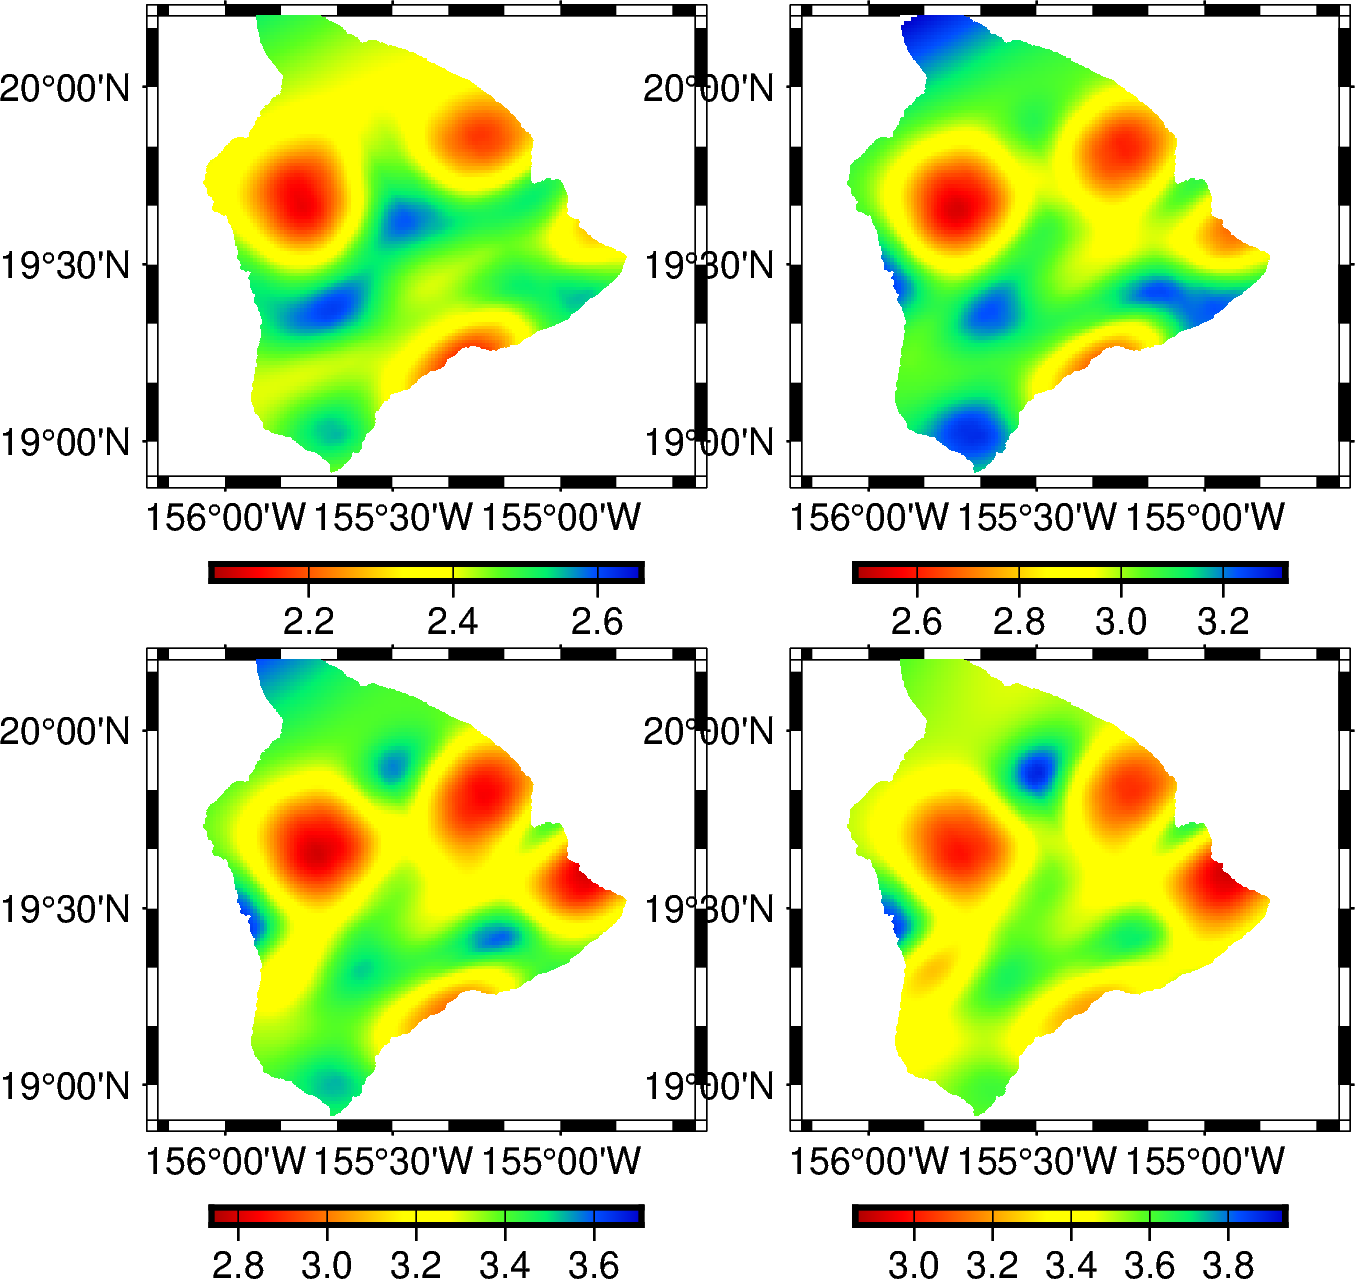

In [37]:
fig = pygmt.Figure()
dep = [2, 4, 6, 8]
with fig.subplot(nrows=2, ncols=2, figsize=("10c", "10c"), frame=["af", "WSne"]):
    for i, depth in enumerate(dep):
        close_dep = z[np.abs(z-depth).argmin()]
        data = fm_tab[fm_tab["dep"]==close_dep]
        fig.basemap(region=region, projection="M?", panel=i)
        grid = pygmt.surface(x=data['lon'], y=data['lat'], z=data['vs'], region=region, spacing="0.01" )
        vmax = data['vs'].max()+0.05; vmin = data['vs'].min()-0.05
        pygmt.makecpt(cmap="seis", series=[vmin, vmax])
        fig.coast(area_thresh=10, resolution='f', land=True)
        fig.grdimage(grid=grid, cmap=True)
        fig.coast(Q=True)
        # fig.plot(x=stx, y=sty, style="t0.3c", fill="red", pen="0.3p,255")
        fig.colorbar(frame=['a0.2g0.2'])
fig.show()